In [ ]:
from graph_tool.all import *
import pandas as pd
import numpy as np
import pickle

In [2]:
#%matplotlib inline
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#==================================================================== 
# load data prepared by aggregate_travel_time2.py
#==================================================================== 
df_trajectories = pd.read_pickle("df_trajectories.pkl")
df_travel_segment = pd.read_pickle("df_travel_segment.pkl")

#==================================================================== 
# group data be weekday and/or 20min bin
#==================================================================== 
df_trajectories['day_of_week'] = df_trajectories['starting_time'].dt.dayofweek
df_trajectories['minute_block'] = df_trajectories["starting_time"].map( lambda t : "%02d%02d" % (t.hour, int(t.minute/20)*20))

avg_segment_time_week = df_travel_segment.groupby( ['day_of_week', 'minute_block', 'link_id']).aggregate(np.average)
avg_route_time_week   = df_trajectories.groupby( ['intersection_id', 'tollgate_id', 'day_of_week', 'minute_block',]).aggregate(np.average)
avg_route_time_whole  = df_trajectories.groupby( ['intersection_id', 'tollgate_id', pd.TimeGrouper( key="starting_time", freq="20min"), ] ).aggregate(np.average)

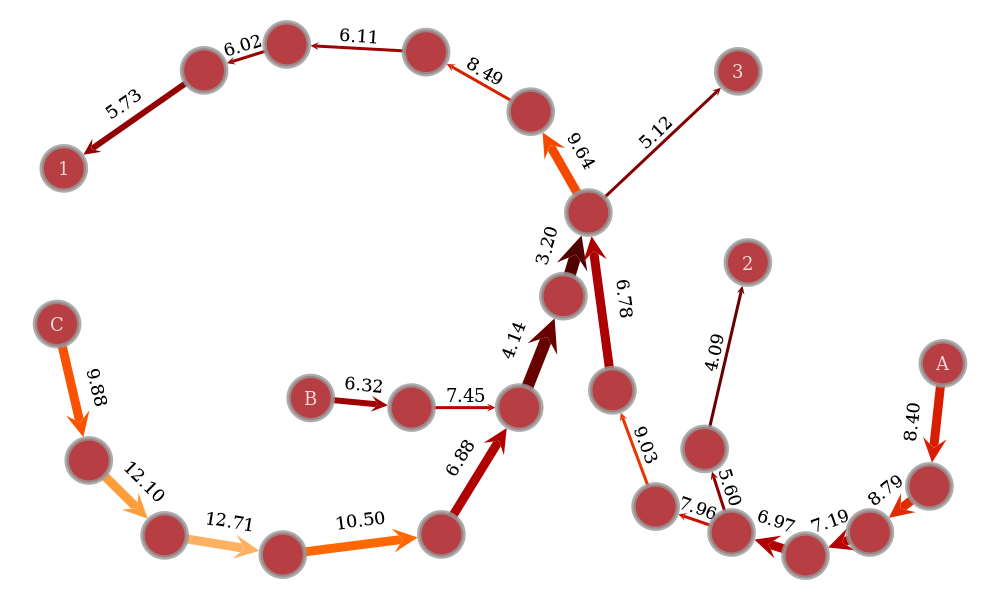

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f58346ac7b8, at 0x7f58346acc18>

In [4]:
g = load_graph("phase1_road_network.gt")

tmpTxt = g.new_edge_property("string")
tmpWidth = g.new_edge_property("double")
tmpColor = g.new_edge_property("vector<double>")
tmpAvgTime = avg_segment_time_week.mean(level=2) #level=2 means average over same link_id

for e in g.edges():
  #tmpTxt[e] = "%s %.0fm %d" %( eName[e], eLen[e], eLanes[e])
  tmpTxt[e] = "%.2f" % (g.ep.eLen[e]/tmpAvgTime.ix[ g.ep.eName[e] ])
  tmpColor[e] = matplotlib.cm.gist_heat((g.ep.eLen[e]/tmpAvgTime.ix[ g.ep.eName[e] ]).ix[0]/15.) #15ms-1 as max speed in color map
  tmpWidth[e] = 3*g.ep.eLanes[e]

graph_draw(g,
           pos=g.vp.vPos,
           vertex_text=g.vp.vName, vertex_font_size=18,
           edge_text=tmpTxt, edge_font_size=18, edge_color=tmpColor,
           edge_pen_width=tmpWidth,
           output_size=(1000, 600),
           inline=True
          )



In [5]:
#===========================================================
#Make dataframe of route travel time by 20min interval on week folded data
#===========================================================
routes = [ ("A",2), ("A",3), ("B",1), ("B",3), ("C",1), ("C",3) ]
routeTime = { aRoute:[] for aRoute in routes }
for day in range(7):
  for hh in range(24):
    for mm in [0,20,40]:
      hhmm = "%02d%02d" % (hh,mm)

      for (startPt, endPt) in routes:
        try:
          t = avg_route_time_week.ix[startPt,endPt, day, hhmm]['travel_time']
        except Exception as err:
          print(err)
          t = np.nan
        routeTime[(startPt, endPt)].append( t )
routeTime = pd.DataFrame ( routeTime, index=pd.date_range('1/10/2100' , '1/16/2100 23:59:59', freq='20min'))

Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many indexers
Too many i

<IPython.core.display.Javascript object>


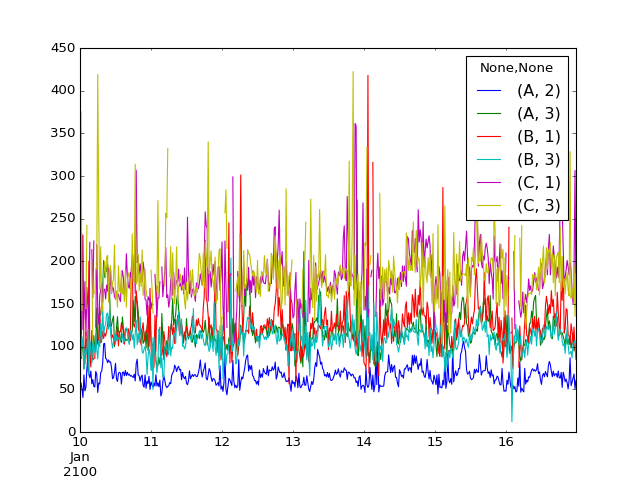

In [6]:
routeTime.plot()